In [1]:
#importing the required modules

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import datetime
!rm -rf ./.logs/
from sklearn.metrics import confusion_matrix , classification_report

In [2]:
#Loading the data as an array of images
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


(50000, 32, 32, 3)

In [4]:
#visualizing the shape of the train images and classified values of images
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [5]:
#visualizing the shape of the test images
x_test.shape, y_train.shape

((10000, 32, 32, 3), (50000, 1))

In [7]:
#visualizing a random image pixel values
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
#normalizing the pixel values of the images from 0.0 to 1.0

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
x_train_normalised = x_train / 255
x_test_normalised = x_test / 255

In [9]:
#y_train consists of values from 0 to 9 which show which class the image belongs to
y_train[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [10]:
#reshaping the y_train and y_test array so that it can be used easily as inputs for the model
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [11]:
#visualizing the normalized image as an array
x_train_normalised[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [12]:
#numbers from 0 to 9 represent the following classes.
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
#function to plot image and its respective class
def image(x, y, i):
    plt.imshow(x[i]) 
    plt.xlabel(classes[y[i]])

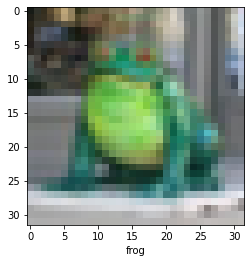

In [14]:
#plotting a random image
image(x_train_normalised, y_train, 19)

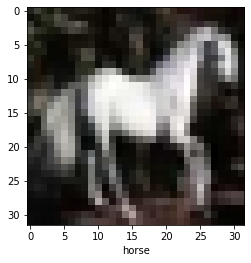

In [15]:
#plotting another random image
image(x_test_normalised, y_test, 13)

In [16]:
#defining the CNN model and all its layers

cnn_model= tf.keras.models.Sequential([
    layers.Conv2D(filters = 64, kernel_size = 3, strides = (1,1) ,padding = 'same', activation='relu', input_shape = (32,32,3)),
    layers.Dropout(0.2),
    layers.BatchNormalization(),

    layers.Conv2D(filters = 128, kernel_size = 3, strides = (1,1) ,padding = 'same', activation='relu'),
    layers.MaxPool2D(pool_size= (2,2)),
    layers.Dropout(0.2),
    layers.BatchNormalization(),

    layers.Conv2D(filters = 256, kernel_size = 3, strides = (1,1) ,padding = 'same', activation='relu'),
    layers.MaxPool2D(pool_size= (2,2)),
    layers.Dropout(0.2),
    layers.BatchNormalization(),

    layers.Conv2D(filters = 512, kernel_size = 3, strides = (1,1) ,padding = 'same', activation='relu'),
    layers.MaxPool2D(pool_size= (2,2)),
    layers.Dropout(0.2),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dropout(0.2),

    layers.Dense(128, activation= 'relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),

    layers.Dense(256, activation= 'relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),

    layers.Dense(512, activation= 'relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),

    layers.Dense(1024, activation= 'relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),

    layers.Dense(10, activation='softmax')
])

In [18]:
#Summary of the made model to visualize it 
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       5

In [19]:
#compiling the model and assigning callbacks to tensorboard to plot graphs later
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [20]:
#training the model
training_history = cnn_model.fit(x_train_normalised, y_train, epochs=20, batch_size=16,
          validation_data=(x_test_normalised, y_test),
          callbacks=[tensorboard_callback]
)

Epoch 1/20
3125/3125 [==============================] - 126s 30ms/step - loss: 1.7938 - accuracy: 0.3853 - val_loss: 1.2225 - val_accuracy: 0.5655
Epoch 2/20
3125/3125 [==============================] - 80s 26ms/step - loss: 1.2433 - accuracy: 0.5708 - val_loss: 1.0980 - val_accuracy: 0.6143
Epoch 3/20
3125/3125 [==============================] - 81s 26ms/step - loss: 1.0405 - accuracy: 0.6470 - val_loss: 1.0117 - val_accuracy: 0.6541
Epoch 4/20
3125/3125 [==============================] - 83s 26ms/step - loss: 0.9148 - accuracy: 0.6903 - val_loss: 0.7221 - val_accuracy: 0.7529
Epoch 5/20
3125/3125 [==============================] - 114s 37ms/step - loss: 0.8173 - accuracy: 0.7243 - val_loss: 0.6921 - val_accuracy: 0.7625
Epoch 6/20
3125/3125 [==============================] - 111s 36ms/step - loss: 0.7517 - accuracy: 0.7444 - val_loss: 0.6512 - val_accuracy: 0.7748
Epoch 7/20
3125/3125 [==============================] - 80s 26ms/step - loss: 0.6882 - accuracy: 0.7677 - val_loss: 0.565

In [21]:
#evaluating the model performance against test dataset
cnn_model.evaluate(x_test_normalised, y_test)

313/313 [==============================] - 4s 10ms/step - loss: 0.5032 - accuracy: 0.8369


[0.5031639933586121, 0.836899995803833]

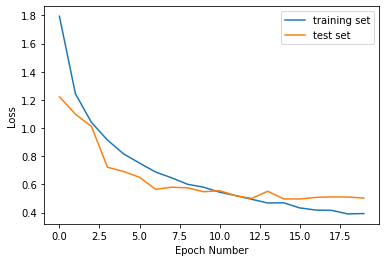

In [22]:
#plotting Loss vs number of epochs
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

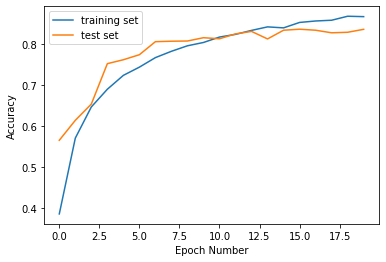

In [23]:
#plotting Accuracy vs number of epochs
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

Text(69.0, 0.5, 'Truth')

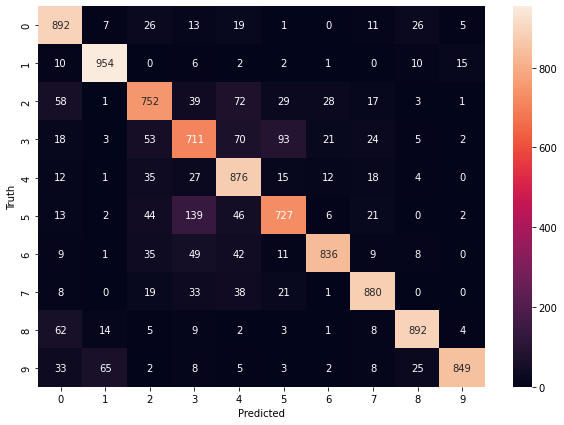

In [24]:
#plotting the confusion matrix to visualize the model predictions
y_predicted = cnn_model.predict(x_test_normalised)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [25]:
#printing the classification report
print(classification_report(y_test, y_predicted_labels))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1000
           1       0.91      0.95      0.93      1000
           2       0.77      0.75      0.76      1000
           3       0.69      0.71      0.70      1000
           4       0.75      0.88      0.81      1000
           5       0.80      0.73      0.76      1000
           6       0.92      0.84      0.88      1000
           7       0.88      0.88      0.88      1000
           8       0.92      0.89      0.90      1000
           9       0.97      0.85      0.90      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [26]:
#predicting the model for test dataset
y_pred = cnn_model.predict(x_test_normalised)

In [27]:
#prediction of model on any random test image
np.argmax(y_pred[12])

5

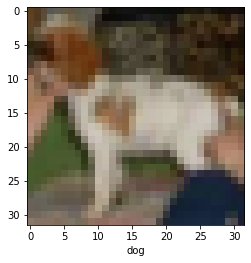

In [28]:
#as we can see the model predicted correctly. 5 stands for dog class
image(x_test_normalised, y_test, 12)

In [29]:
#prediction of model on any random test image
np.argmax(y_pred[65])

2

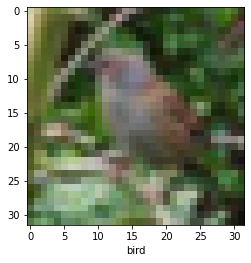

In [30]:
#as we can see the model predicted correctly. 2 stands for dog class
image(x_test_normalised, y_test, 65)